## Pytorch Basic

### Pytorch import

In [3]:
import torch

print(torch.__version__)

1.12.1+cu113


In [2]:
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import numpy as np

### Pytorch 맛보기



### Tensor

텐서(tensor)는 배열(array)이나 행렬(matrix)과 매우 유사한 특수한 자료구조입니다. PyTorch에서는 텐서를 사용하여 모델의 입력(input)과 출력(output), 그리고 모델의 매개변수들을 부호화(encode)합니다.

In [ ]:
# list로부터 직접 tensor 생성하기 
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


In [ ]:
# numpy array로부터 tensor 생성하기
np_array = np.array(data)
print(np_array)

[[1 2]
 [3 4]]


In [ ]:
# 각각이 메모리를 할당받고 있음 (메모리를 낭비하는 상황이 생길 수 있음)
x_np_1 = torch.tensor(np_array)
print(x_np_1)

tensor([[1, 2],
        [3, 4]])


In [ ]:
# 메모리 주소값을 할당 받아서 같이 씀
x_np_2 = torch.as_tensor(np_array)
print(x_np_2)

tensor([[1, 2],
        [3, 4]])


In [ ]:
# 메모리 주소값을 할당 받아서 같이 씀
x_np_3 = torch.from_numpy(np_array)
print(x_np_3)

tensor([[1, 2],
        [3, 4]])


In [ ]:
x_np_1[0,0] = 5
print(x_np_1)
print(np_array)

tensor([[5, 2],
        [3, 4]])
[[1 2]
 [3 4]]


In [ ]:
x_np_2[0,0] = 6
print(x_np_2)
print(np_array)

tensor([[6, 2],
        [3, 4]])
[[6 2]
 [3 4]]


In [ ]:
x_np_3[0,0] = 7
print(x_np_3)
print(np_array)

tensor([[7, 2],
        [3, 4]])
[[7 2]
 [3 4]]


In [ ]:
np_array

array([[7, 2],
       [3, 4]])

In [ ]:
np_again = x_np_1.numpy() # 넘파이로 변경
print(np_again, type(np_again))

[[5 2]
 [3 4]] <class 'numpy.ndarray'>


In [ ]:
# 넘파이 메소드와 동일
a = torch.ones(2,3)
b = torch.zeros(2,3)
c = torch.full((2,3), 2)
d = torch.empty(2,3)
print(a)
print(b)
print(c)
print(d)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[2, 2, 2],
        [2, 2, 2]])
tensor([[4.6094e+32, 0.0000e+00, 1.4434e-33],
        [0.0000e+00, 3.8825e+32, 0.0000e+00]])


In [ ]:
# parameter와 같은 shape의 tensor 반환
e = torch.zeros_like(c)
f = torch.ones_like(c)
g = torch.full_like(c, 3)
h = torch.empty_like(c)
print(e)
print(f)
print(g)
print(h)

tensor([[0, 0, 0],
        [0, 0, 0]])
tensor([[1, 1, 1],
        [1, 1, 1]])
tensor([[3, 3, 3],
        [3, 3, 3]])
tensor([[         1974848896,                  24,          4294967295],
        [8171062582517395298, 8243662592152856949, 7310305785198503009]])


In [ ]:
i = torch.eye(3)
print(i)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [ ]:
j = torch.arange(10)
print(j)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [ ]:
k = torch.rand(2,2)
l = torch.randn(2,2)
print(k)
print(l)

tensor([[0.4517, 0.3143],
        [0.5540, 0.0017]])
tensor([[-1.7415,  1.7339],
        [ 0.6828, -1.5186]])


#### Tensor의 속성

In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [4]:
# 속성 변경
tensor = tensor.reshape(4,3)
tensor = tensor.int()

# gpu 디바이스로 변경
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

NameError: ignored

### Indexing과 Slicing

In [ ]:
a = torch.arange(1, 13).reshape(3, 4)
print(a)

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])


In [ ]:
# indexing (차원이 축소된다)
print(a[1])
print(a[0,-1])

tensor([5, 6, 7, 8])
tensor(4)


In [ ]:
# slicing (차원 유지)
print(a[1:-1]) 
print(a[:2, 2:])

tensor([[5, 6, 7, 8]])
tensor([[3, 4],
        [7, 8]])


### Transpose - 파이썬 numpy와 살짝 다름

In [ ]:
a = torch.arange(16).reshape(2,2,4)
print(a, a.shape)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]]]) torch.Size([2, 2, 4])


In [ ]:
# 2, 2, 4의 차원을 가진 tensor를 2번째와 3번째를 transpose시킨다
b = a.transpose(1, 2)
print(b, b.shape)

tensor([[[ 0,  4],
         [ 1,  5],
         [ 2,  6],
         [ 3,  7]],

        [[ 8, 12],
         [ 9, 13],
         [10, 14],
         [11, 15]]]) torch.Size([2, 4, 2])


In [ ]:
c = a.permute((2, 0, 1))
print(c, c.shape)

tensor([[[ 0,  4],
         [ 8, 12]],

        [[ 1,  5],
         [ 9, 13]],

        [[ 2,  6],
         [10, 14]],

        [[ 3,  7],
         [11, 15]]]) torch.Size([4, 2, 2])


### Tensor 연산

In [ ]:
x = torch.tensor([[1,2], [3,4]], dtype=torch.float32)
y = torch.tensor([[5,6], [7,8]], dtype=torch.float32)
print(x)
print(y)

tensor([[1., 2.],
        [3., 4.]])
tensor([[5., 6.],
        [7., 8.]])


In [ ]:
print(x + y)
print(x - y)
print(x * y)
print(x / y)
print(x @ y)

print('='*30)

print(torch.add(x, y))
print(torch.subtract(x, y))
print(torch.multiply(x, y))
print(torch.divide(x, y))
print(torch.matmul(x, y))

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[-4., -4.],
        [-4., -4.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])
tensor([[19., 22.],
        [43., 50.]])
tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[-4., -4.],
        [-4., -4.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])
tensor([[19., 22.],
        [43., 50.]])


In [ ]:
print(x.add(y))
print(x)

# in-place 연산 (바로 반영)
print(x.add_(y))
print(x)

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[ 6.,  8.],
        [10., 12.]])


In [ ]:
z = torch.arange(1, 11).reshape(2, 5)
print(z)

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])


In [ ]:
sum1 = torch.sum(z, axis=0)
sum2 = torch.sum(z, axis=1)
sum3 = torch.sum(z, axis=-1)
print(sum1, sum1.shape)
print(sum2, sum2.shape)
print(sum3, sum3.shape)

tensor([ 7,  9, 11, 13, 15]) torch.Size([5])
tensor([15, 40]) torch.Size([2])
tensor([15, 40]) torch.Size([2])


In [ ]:
a = torch.arange(24).reshape(4, 6)

# tensor copy
b = a.clone().detach()
print(a, a.shape)
print(b, b.shape)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]) torch.Size([4, 6])
tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]) torch.Size([4, 6])


In [ ]:
c = torch.cat([a, b], axis=0)
print(c, c.shape)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23],
        [ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]) torch.Size([8, 6])


In [ ]:
c = torch.cat([a, b], axis=-1)
print(c, c.shape)

tensor([[ 0,  1,  2,  3,  4,  5,  0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11,  6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17, 12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23, 18, 19, 20, 21, 22, 23]]) torch.Size([4, 12])


In [ ]:
# 축 하나를 더 만듦
d = torch.stack([a, b], axis=0)
print(d, d.shape)

tensor([[[ 0,  1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10, 11],
         [12, 13, 14, 15, 16, 17],
         [18, 19, 20, 21, 22, 23]],

        [[ 0,  1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10, 11],
         [12, 13, 14, 15, 16, 17],
         [18, 19, 20, 21, 22, 23]]]) torch.Size([2, 4, 6])


In [ ]:
d = torch.stack([a, b], axis=-1)
print(d, d.shape)

tensor([[[ 0,  0],
         [ 1,  1],
         [ 2,  2],
         [ 3,  3],
         [ 4,  4],
         [ 5,  5]],

        [[ 6,  6],
         [ 7,  7],
         [ 8,  8],
         [ 9,  9],
         [10, 10],
         [11, 11]],

        [[12, 12],
         [13, 13],
         [14, 14],
         [15, 15],
         [16, 16],
         [17, 17]],

        [[18, 18],
         [19, 19],
         [20, 20],
         [21, 21],
         [22, 22],
         [23, 23]]]) torch.Size([4, 6, 2])


## Dataset / Dataloader

Data를 처리하여 model에 공급하는 방법으로 Pytorch에서는 Dataset과 DataLoader를 제공합니다.

Dataset은 data와 label을 저장하고, DataLoader는 Dataset을 model에 공급할 수 있도록 iterable 객체로 감싸줍니다.

### FasionMNIST data

In [5]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as tr

In [6]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True, # train set
    download=True, # 실제 다운로드
    transform=ToTensor() # tensor로 바꾸고 데이터를 0~1로 scaling
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False, # test set
    download=True, 
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



### 데이터 시각화하기

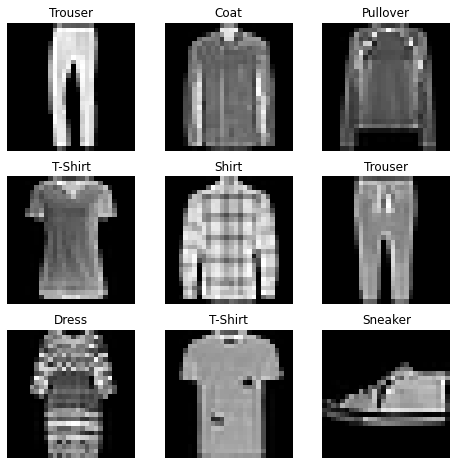

In [25]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### DataLoader 만들기

In [28]:
# DataLoader 만들기
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


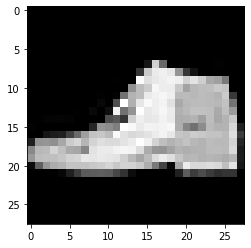

Label: 9


In [37]:
# DataLoader를 통해 반복하기(iterate)
# 이미지와 정답(label)을 표시합니다.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}") #28*28의 img
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze() # 채널??이 파이토치 첫번째에 있는데 plt 시각화를 위해서 1을 없애줘야함
label = train_labels[0]

plt.imshow(img, cmap="gray")
plt.show()

print(f"Label: {label}")

### Custom Dataset, Data Loader 만들기

In [42]:
# 간단한 Custom Dataset/Transform/DataLoader 만들기

class CustomDataset(Dataset): # torch.utils.dataset 으로부터 상속
  def __init__(self, np_data, transform=None): # 처음 calss 정의 시 실행
    self.data = np_data
    self.transform = transform
    self.len = np_data.shape[0]

  def __len__(self):
    return self.len

  def __getitem__(self, idx): # item, 즉 원소에 idx로 접근할 때마다 수행
    sample = self.data[idx]
    if self.transform:
      sample = self.transform(sample)
    return sample

In [43]:
def square(sample):
  return sample**2

In [44]:
# torchvision.transforms
trans = tr.Compose([square])

In [45]:
np_data = np.arange(10)

custom_dataset = CustomDataset(np_data, transform=trans)

In [46]:
custom_dataloader = DataLoader(custom_dataset, batch_size=2, shuffle=True)

In [55]:
custom_dataset[2]

4

In [56]:
for _ in range(3): # epoch
  for data in custom_dataloader: # batch
    print(data)
  print("="*20)

tensor([ 1, 25])
tensor([81, 16])
tensor([64, 36])
tensor([0, 4])
tensor([49,  9])
tensor([49, 64])
tensor([0, 4])
tensor([81,  1])
tensor([ 9, 25])
tensor([16, 36])
tensor([64,  4])
tensor([49, 81])
tensor([0, 1])
tensor([16,  9])
tensor([25, 36])


## Model

In [57]:
# device 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


### Model class 만들기

In [58]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten() # 1열로 펴준다
        self.linear_relu_stack = nn.Sequential( # 한번에 묶어서 쓰기 위한 sequential
            nn.Linear(28*28, 128), # dataset의 input을 받는다 (tesorflow와의 차이점)
            nn.ReLU(),
            nn.Dropout(0.2),            
            nn.Linear(128, 10) # loss 계산 시에 softmax 사용하기 때문에 빠져있음
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [59]:
# Model instance 생성, device 설정
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [60]:
# 가상의 data 만들어서 예측해보기
X = torch.rand(1, 28, 28, device=device)

logits = model(X)

pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([9], device='cuda:0')


## Training / Validation

#### Loss Function

In [ ]:
# 손실 함수를 초기화합니다.
loss_fn = nn.CrossEntropyLoss()

### Optimizer

In [ ]:
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### Training / Validation(Test) Function

In [ ]:
# Training을 위한 함수
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        # 예측(prediction)과 손실(loss) 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Test를 위한 함수
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
# 학습 진행하기
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

## Model 저장하고 불러오기

#### parameter만 저장하고 불러오기

In [ ]:
# 학습된 model parameter 저장
torch.save(model.state_dict(), 'model_weights.pth')

In [ ]:
# 새 Model instance 생성, device 설정
model2 = NeuralNetwork().to(device)
print(model2)

In [ ]:
# test
model2.eval()
test_loop(test_dataloader, model2, loss_fn)

In [ ]:
# 저장한 parameter 불러오기
model2.load_state_dict(torch.load('model_weights.pth'))

In [ ]:
# test
model2.eval()
test_loop(test_dataloader, model2, loss_fn)

### Model 전체를 저장하고 불러오기

In [ ]:
# 저장하기
torch.save(model, 'model.pth')

In [ ]:
# 불러오기
model3 = torch.load('model.pth')

In [ ]:
# test
model3.eval()
test_loop(test_dataloader, model2, loss_fn)

## Tensorboard 사용하여 시각화하기

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('./logs/pytorch')

In [ ]:
# 새 Model instance 생성, device 설정
model4 = NeuralNetwork().to(device)
print(model4)

model4.eval()
test_loop(test_dataloader, model4, loss_fn)

In [ ]:
X = torch.rand(1, 28, 28, device=device)
writer.add_graph(model4, X)

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    total_loss = 0.
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # 예측(prediction)과 손실(loss) 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
        
        total_loss += loss / len(dataloader)
    return total_loss 

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss

In [ ]:
parameters = ['Weight1', 'Bias1', 'Weight2', 'Bias2']

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loss = train(train_dataloader, model, loss_fn, optimizer)
    writer.add_scalar('training loss', train_loss, t)
    for param, name in zip(model.parameters(), parameters):
        writer.add_histogram(name, param, t)
    test_loss = test(test_dataloader, model, loss_fn)
    writer.add_scalar('test_loss', test_loss, t)
print("Done!")

In [ ]:
writer.close()

In [ ]:
%tensorboard --logdir './logs/pytorch'